In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings

In [3]:
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',300)

In [4]:
path_processed = "../data/processed/pjud"

In [5]:
df_causas = pd.read_feather(f"{path_processed}/consolidated_FULLDATA_CAUSAS.feather")
print(f"{len(df_causas)} registros en el dataset")

4531094 registros en el dataset


In [6]:
df_causas.columns

Index(['index', 'region', 'cod_corte', 'corte', 'tribunal_rit', 'cod_tribunal',
       'rit', 'tribunal', 'tipo_juzgado', 'dotacion_jueces', 'tipo_causa',
       'fecha_ingreso', 'año_ingreso', 'cod_materia', 'materia',
       'tipologia_materia', 'vigencia_materia', 'total_ingresos_materia',
       'total_terminos', 'fecha_termino', 'año_termino', 'duracion_causa',
       'motivo_termino', 'asiento', 'comunas', 'poblacion', 'hombres',
       'mujeres', 'urbano', 'rural'],
      dtype='object')

In [7]:
df_causas.head()

,index,region,cod_corte,corte,tribunal_rit,cod_tribunal,rit,tribunal,tipo_juzgado,dotacion_jueces,tipo_causa,fecha_ingreso,año_ingreso,cod_materia,materia,tipologia_materia,vigencia_materia,total_ingresos_materia,total_terminos,fecha_termino,año_termino,duracion_causa,motivo_termino,asiento,comunas,poblacion,hombres,mujeres,urbano,rural
0,0,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-1-2018,988,1-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,Ordinaria,2018-01-02,2018.0,10008.0,PORTE DE ARMA PROHIBIDA (ART. 14 INC. 1°).,LEY 17.798 CONTROL DE ARMAS,VIGENTE,1.0,1.0,2018-03-05,2018.0,62.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
1,1,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-2-2018,988,2-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,Ordinaria,2018-01-03,2018.0,710.0,LESIONES MENOS GRAVES. ART. 399.,LIBRO II TITULO VIII CRIMENES Y SIMPLES DELIT...,VIGENTE,1.0,1.0,2019-09-16,2019.0,621.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
2,2,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-2-2018,988,2-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,Ordinaria,2018-01-03,2018.0,12149.0,DESACATO ART. 240 CODIGO DE PROCEDIMIENTO CIVIL,INFRACCION A OTROS TEXTOS LEGALES,VIGENTE,1.0,1.0,2019-09-16,2019.0,621.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
3,3,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-3-2018,988,3-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,Ordinaria,2018-01-03,2018.0,802.0,"ROBO CON INTIMIDACION . ART. 433, 436 INC. 1º...",LIBRO II TITULO IX CRIMENES Y SIMPLES DELITOS ...,VIGENTE,1.0,1.0,2018-02-20,2018.0,48.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
4,4,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-4-2018,988,4-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,Ordinaria,2018-01-03,2018.0,7007.0,TRAFICO ILICITO DE DROGAS ART. 3 LEY Nº 20.000.,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,1.0,1.0,2018-03-26,2018.0,82.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837


## Analisis Tribunales Orales

In [8]:
causas_oral = df_causas[df_causas['tipo_juzgado'] == 'ORAL']

In [9]:
df_delitos_oral = causas_oral['materia'].value_counts().rename_axis('Delitos').to_frame('Total').query("Total>3000")

In [10]:
df_delitos_oral

,Total
Delitos,
MICROTRAFICO (TRAFICO DE PEQUEÑAS CANTIDADES ART. 4 LEY Nº 20.000).,9021
RECEPTACION. ART. 456 BIS A,6593
TRAFICO ILICITO DE DROGAS ART. 3 LEY Nº 20.000.,6175
"ROBO CON INTIMIDACION . ART. 433, 436 INC. 1º 438.",6064
ROBO EN LUGAR HABITADO O DESTINADO A LA HABITACION. ART. 440.,4815
DESACATO ART. 240 CODIGO DE PROCEDIMIENTO CIVIL,4582
"ROBO CON VIOLENCIA. ART.436 INC. 1º 433, 438, 439.",4331
ABUSO SEXUAL CON CONTACTO CORPORAL DE MENOR DE 14 AÑOS. ART. 366 BIS,3376
"POSESION, TENENCIA O PORTE DE ARMAS SUJETAS A CONTROL (ART. 9 INC. 1°) LEY 17.798",3341


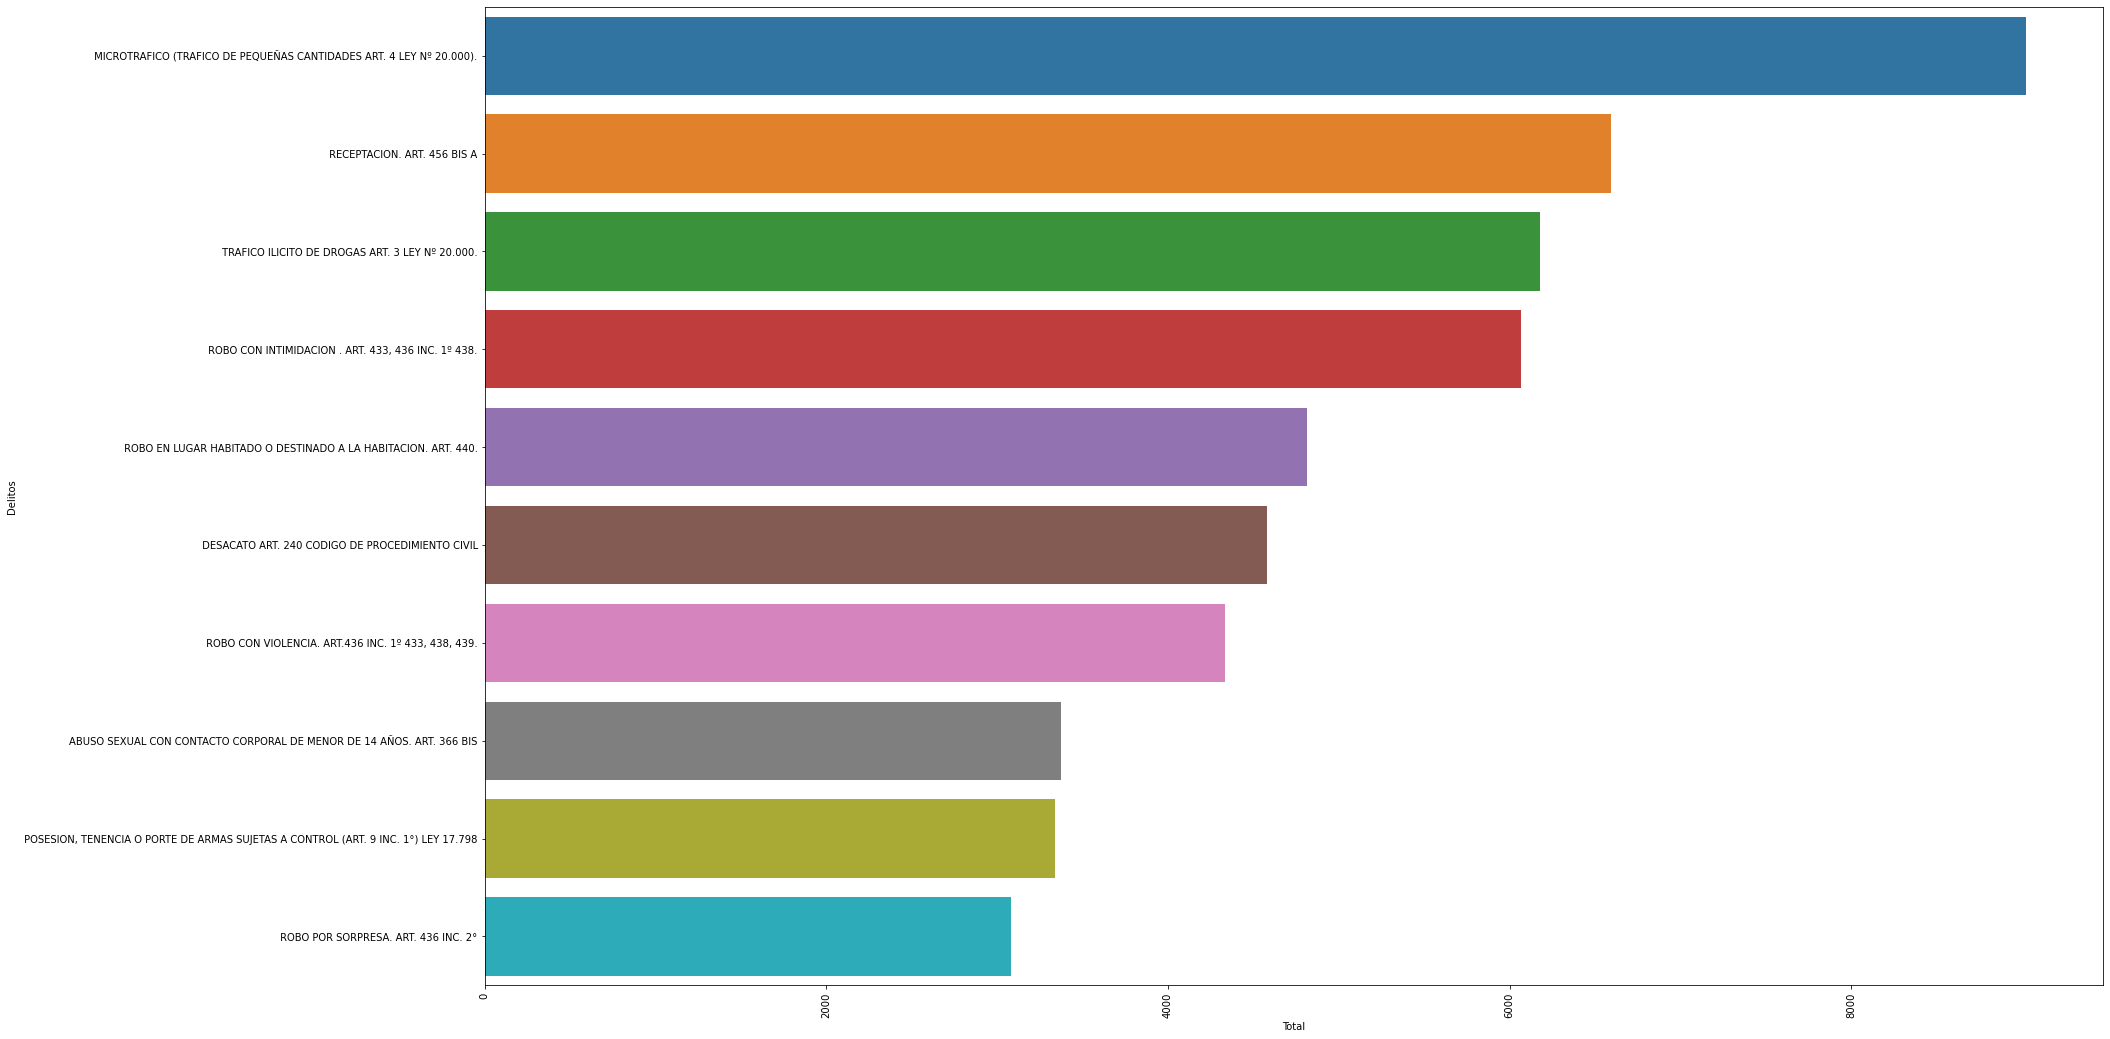

In [11]:
fig, axes = plt.subplots(1, 1, figsize=(29, 18))
sns.barplot(y=df_delitos_oral.index, x="Total", data=df_delitos_oral, orient="h")
plt.xticks(rotation= 90 );


In [14]:
causas_oral['tipologia_materia'].unique()

array(['LEY 17.798 CONTROL DE ARMAS',
       'LIBRO II  TITULO VIII CRIMENES Y SIMPLES DELITOS CONTRA LAS PERSONAS',
       'INFRACCION A OTROS TEXTOS LEGALES',
       'LIBRO II TITULO IX CRIMENES Y SIMPLES DELITOS CONTRA LA PROPIEDAD',
       'LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES Y SUSTANCIAS SICOTROPICAS',
       'LEY DE TRANSITO',
       'LIBRO II  TITULO VII  CRIMENES Y SIMPLES DELITOS CONTRA EL ORDEN DE LAS FAMILIAS, CONTRA LA MORALIDAD PUBLICA Y CONTRA LA INTEGRIDAD SEXUAL',
       'LIBRO II  TITULO VI  CRIMENES Y SIMPLES DELITOS CONTRA EL ORDEN Y LA SEGURIDAD PUBLICO COMETIDO POR PARTICULARES',
       'FALTAS LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES Y SUSTANCIAS SICOTROPICAS',
       'FALTAS',
       'INFRACCION A LEYES ESPECIALES - LEY 17.798 CONTROL DE ARMAS',
       'LIBRO II  TITULO IV  CRIMENES Y SIMPLES DELITOS CONTRA LA FE PUBLICA, DE LAS FALSIFICACIONES, DEL FALSO TESTIMONIO Y DEL PERJURIO',
       'LIBRO II  TITULO III  CRIMENES Y SIMPLES DELITOS QUE AFECT

In [16]:
juicios = causas_oral[causas_oral['tipo_audiencia']=='AUDIENCIA DE JUICIO ORAL TOP']

In [17]:
causas_juiciooral_ley20000 = causas_oral[(causas_oral['tipologia_materia'].str.contains('LEY 20.000')) & (causas_oral['tipo_audiencia']=='AUDIENCIA DE JUICIO ORAL TOP')]

In [18]:
causas_juiciooral_ley20000.tail()

,index,region,cod_corte,corte,tribunal_rit,cod_tribunal,rit,tribunal,tipo_juzgado,dotacion_jueces,tipo_causa,fecha_ingreso,año_ingreso,cod_materia,materia,tipologia_materia,vigencia_materia,tipo_audiencia,fecha_programacion_audiencia,fecha_audiencia,dias_agendamiento,duracion_audiencia_minutos,total_audiencias,total_ingresos_materia,total_terminos,fecha_termino,año_termino,duracion_causa,motivo_termino,asiento,comunas,poblacion,hombres,mujeres,urbano,rural
14054051,14054051,REGION DE VALPARAISO,30.0,C.A. DE VALPARAISO,1059-37-2019,1059,37-2019,TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN FELIPE,ORAL,4,Ordinaria,2019-03-28,2019.0,7099.0,OTROS DELITOS DE LA LEY 20.000.,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2019-07-17,2019-08-13,27.0,163,1.0,1.0,1.0,2019-08-16,2019.0,141.0,SENTENCIA,SAN FELIPE,"[SAN FELIPE, CATEMU, LLAILLAY, PANQUEHUE, PUTA...",154718,76038,78680,115730,38988
14055355,14055355,REGION DE VALPARAISO,30.0,C.A. DE VALPARAISO,1054-180-2017,1054,180-2017,TRIBUNAL DE JUICIO ORAL EN LO PENAL VALPARAISO,ORAL,19,Ordinaria,2017-04-12,2017.0,7037.0,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2017-04-13,2017-06-07,55.0,63,1.0,1.0,1.0,2017-06-12,2017.0,61.0,SENTENCIA,VALPARAISO,"[JUAN FERNANDEZ, VALPARAISO, CASABLANCA, ISLA ...",332198,162609,169589,321242,10956
14055359,14055359,REGION DE VALPARAISO,30.0,C.A. DE VALPARAISO,1054-193-2017,1054,193-2017,TRIBUNAL DE JUICIO ORAL EN LO PENAL VALPARAISO,ORAL,19,Ordinaria,2017-04-17,2017.0,7037.0,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2017-04-18,2017-05-30,42.0,59,1.0,1.0,1.0,2017-06-02,2017.0,46.0,SENTENCIA,VALPARAISO,"[JUAN FERNANDEZ, VALPARAISO, CASABLANCA, ISLA ...",332198,162609,169589,321242,10956
14056098,14056098,REGION DEL MAULE,40.0,C.A. DE TALCA,958-53-2017,958,53-2017,TRIBUNAL DE JUICIO ORAL EN LO PENAL TALCA,ORAL,7,Ordinaria,2017-02-28,2017.0,7037.0,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2017-03-01,2017-08-10,162.0,174,1.0,1.0,1.0,2017-08-14,2017.0,167.0,SENTENCIA,TALCA,"[CUREPTO, RIO CLARO, CONSTITUCION, PENCAHUE, T...",412769,201902,210867,330492,82277
14058352,14058352,REGION DE LA ARAUCANIA,50.0,C.A. DE TEMUCO,934-135-2016,934,135-2016,TRIBUNAL DE JUICIO ORAL EN LO PENAL TEMUCO,ORAL,10,Ordinaria,2016-06-11,2016.0,7037.0,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2016-06-13,2016-08-01,49.0,281,1.0,2.0,1.0,2016-08-06,2016.0,56.0,SENTENCIA,TEMUCO,"[LONQUIMAY, CURACAUTIN, GALVARINO, PERQUENCO, ...",664662,322417,342245,470410,194252


In [19]:
print(f"existen {len(causas_juiciooral_ley20000)} registros de delitos llevados a AUDIENCIAS DE JUICIO ORAL RELACIONADAS A LEY 20000 DESDE 2015 AL 2019 ")

existen 23168 registros de delitos llevados a AUDIENCIAS DE JUICIO ORAL RELACIONADAS A LEY 20000 DESDE 2015 AL 2019 


## Por Tribunal y por tipologia

In [16]:
causas_oral.groupby(by=['tipologia_materia','materia','tribunal','año_ingreso'])#.count().sort_values("index", ascending=False).head(250)

## Por Tribunal y por delitos

In [17]:
causas_juiciooral_ley20000.groupby(by=['materia','tribunal'])#.count().sort_values("index", ascending=False).head(250)

NameError: name 'causas_juiciooral_ley20000' is not defined

In [22]:
causas_juiciooral_ley20000

,index,region,cod_corte,corte,tribunal_rit,cod_tribunal,rit,tribunal,tipo_juzgado,dotacion_jueces,tipo_causa,fecha_ingreso,año_ingreso,cod_materia,materia,tipologia_materia,vigencia_materia,tipo_audiencia,fecha_programacion_audiencia,fecha_audiencia,dias_agendamiento,duracion_audiencia_minutos,total_audiencias,total_ingresos_materia,total_terminos,fecha_termino,año_termino,duracion_causa,motivo_termino,asiento,comunas,poblacion,hombres,mujeres,urbano,rural
22,22,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-4-2018,988,4-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,Ordinaria,2018-01-03,2018.0,7007.0,TRAFICO ILICITO DE DROGAS (ART. 3).,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2018-02-13,2018-03-21,36.0,93,1.0,1.0,1.0,2018-03-26,2018.0,82.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
31,31,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-6-2018,988,6-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,Ordinaria,2018-01-04,2018.0,7037.0,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2018-01-04,2018-02-20,47.0,51,1.0,1.0,1.0,2018-02-23,2018.0,50.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
46,46,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-10-2018,988,10-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,Ordinaria,2018-01-10,2018.0,7037.0,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2018-01-11,2018-03-09,57.0,92,1.0,1.0,1.0,2018-03-14,2018.0,63.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
51,51,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-11-2018,988,11-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,Ordinaria,2018-01-10,2018.0,7007.0,TRAFICO ILICITO DE DROGAS (ART. 3).,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2018-01-11,2018-03-06,54.0,101,1.0,1.0,1.0,2018-03-09,2018.0,58.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
55,55,REGION DE ARICA Y PARINACOTA,10.0,C.A. DE ARICA,988-13-2018,988,13-2018,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,ORAL,10,Ordinaria,2018-01-10,2018.0,7007.0,TRAFICO ILICITO DE DROGAS (ART. 3).,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2018-03-10,2018-03-26,16.0,118,1.0,1.0,1.0,2018-03-29,2018.0,78.0,SENTENCIA,ARICA,"[GENERAL LAGOS, PUTRE, ARICA, CAMARONES]",226068,112581,113487,207231,18837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14054051,14054051,REGION DE VALPARAISO,30.0,C.A. DE VALPARAISO,1059-37-2019,1059,37-2019,TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN FELIPE,ORAL,4,Ordinaria,2019-03-28,2019.0,7099.0,OTROS DELITOS DE LA LEY 20.000.,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2019-07-17,2019-08-13,27.0,163,1.0,1.0,1.0,2019-08-16,2019.0,141.0,SENTENCIA,SAN FELIPE,"[SAN FELIPE, CATEMU, LLAILLAY, PANQUEHUE, PUTA...",154718,76038,78680,115730,38988
14055355,14055355,REGION DE VALPARAISO,30.0,C.A. DE VALPARAISO,1054-180-2017,1054,180-2017,TRIBUNAL DE JUICIO ORAL EN LO PENAL VALPARAISO,ORAL,19,Ordinaria,2017-04-12,2017.0,7037.0,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES ...,VIGENTE,AUDIENCIA DE JUICIO ORAL TOP,2017-04-13,2017-06-07,55.0,63,1.0,1.0,1.0,2017-06-12,2017.0,61.0,SENTENCIA,VALPARAISO,"[JUAN FERNANDEZ, VALPARAISO, CASABLANCA, ISLA ...",332198,162609,169589,321242,10956
14055359,14055359,REGION DE VALPARAISO,30.0,C.A. DE VALPARAISO,1054-193-2017,1054,193-2017,TRIBUNAL DE JUICIO ORAL EN LO PENAL VALPARAISO,ORAL,19,Ordinaria,2017-04-17,2017.0,7037.0,TRAFICO DE PEQUEÑAS CANTIDADES (

In [23]:
data = []

for (materia,tribunal), sub_df in causas_juiciooral_ley20000.groupby(by=['materia','tribunal']):
    total = len(sub_df.tribunal_rit.unique())
    poblacion = sub_df.iloc[0].poblacion
    urbano = sub_df.iloc[0].urbano
    rural = sub_df.iloc[0].rural
    proporcion = total / poblacion
    territorial = rural / urbano
    row = [materia, tribunal, total, poblacion, proporcion, territorial]
    data.append(row)

ley20000 = pd.DataFrame(data, columns=['materia','tribunal','total','poblacion','proporcion', 'territorial']).sort_values(["proporcion","materia"], ascending=False)

In [24]:
ley20000

,materia,tribunal,total,poblacion,proporcion,territorial
238,TRAFICO ILICITO DE DROGAS (ART. 3).,TRIBUNAL DE JUICIO ORAL EN LO PENAL IQUIQUE,1095,330558,0.003313,0.066093
227,TRAFICO ILICITO DE DROGAS (ART. 3).,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,660,226068,0.002919,0.090899
206,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN ANTONIO,292,168046,0.001738,0.105479
215,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,TRIBUNAL DE JUICIO ORAL EN LO PENAL VALPARAISO,488,332198,0.001469,0.034105
228,TRAFICO ILICITO DE DROGAS (ART. 3).,TRIBUNAL DE JUICIO ORAL EN LO PENAL CALAMA,206,177048,0.001164,0.079489
193,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,TRIBUNAL DE JUICIO ORAL EN LO PENAL IQUIQUE,378,330558,0.001144,0.066093
182,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,TRIBUNAL DE JUICIO ORAL EN LO PENAL ARICA,225,226068,0.000995,0.090899
181,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,TRIBUNAL DE JUICIO ORAL EN LO PENAL ANTOFAGASTA,388,430486,0.000901,0.055793
241,TRAFICO ILICITO DE DROGAS (ART. 3).,TRIBUNAL DE JUICIO ORAL EN LO PENAL LOS ANDES,75,110602,0.000678,0.213473
183,TRAFICO DE PEQUEÑAS CANTIDADES (ART. 4).,TRIBUNAL DE JUICIO ORAL EN LO PENAL CALAMA,120,177048,0.000678,0.079489


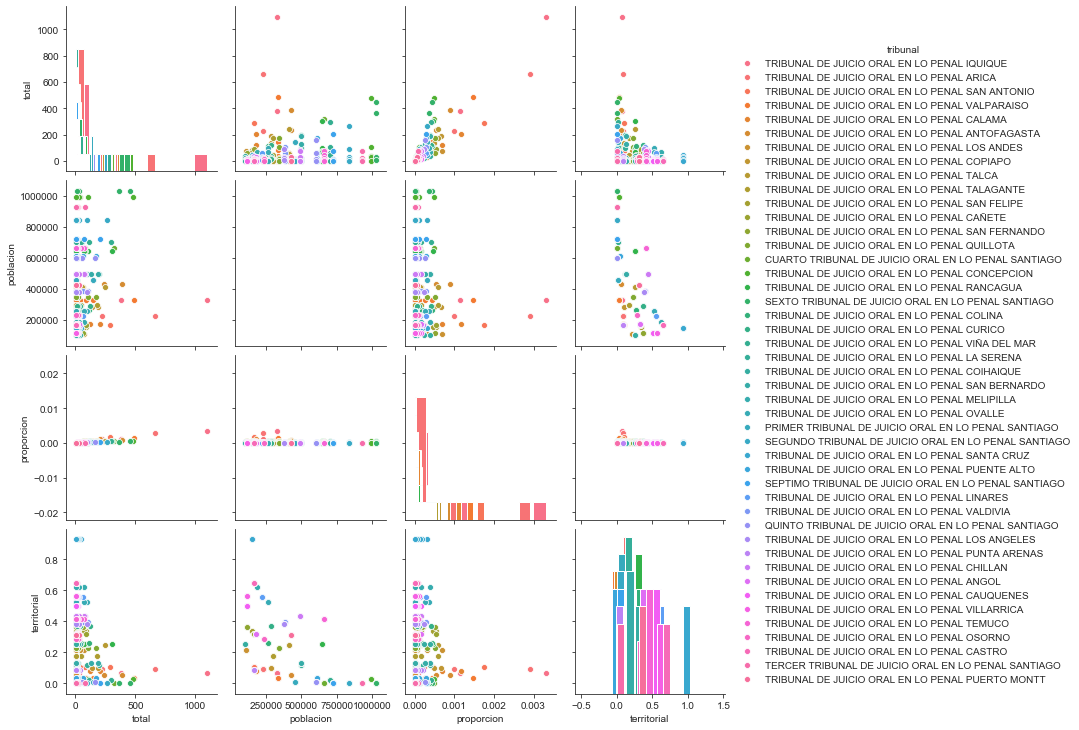

In [25]:
sns.set_style(style="ticks")
sns.pairplot(ley20000, hue="tribunal", diag_kind="hist")

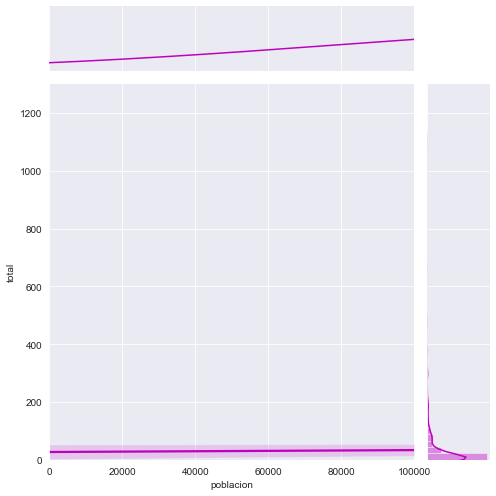

In [26]:
sns.set_style("darkgrid")

g = sns.jointplot(x="poblacion", y="total", data=ley20000,
                  kind="reg", truncate=False,
                  xlim=(0, 100000), ylim=(0, 1300),
                  color="m", height=7)

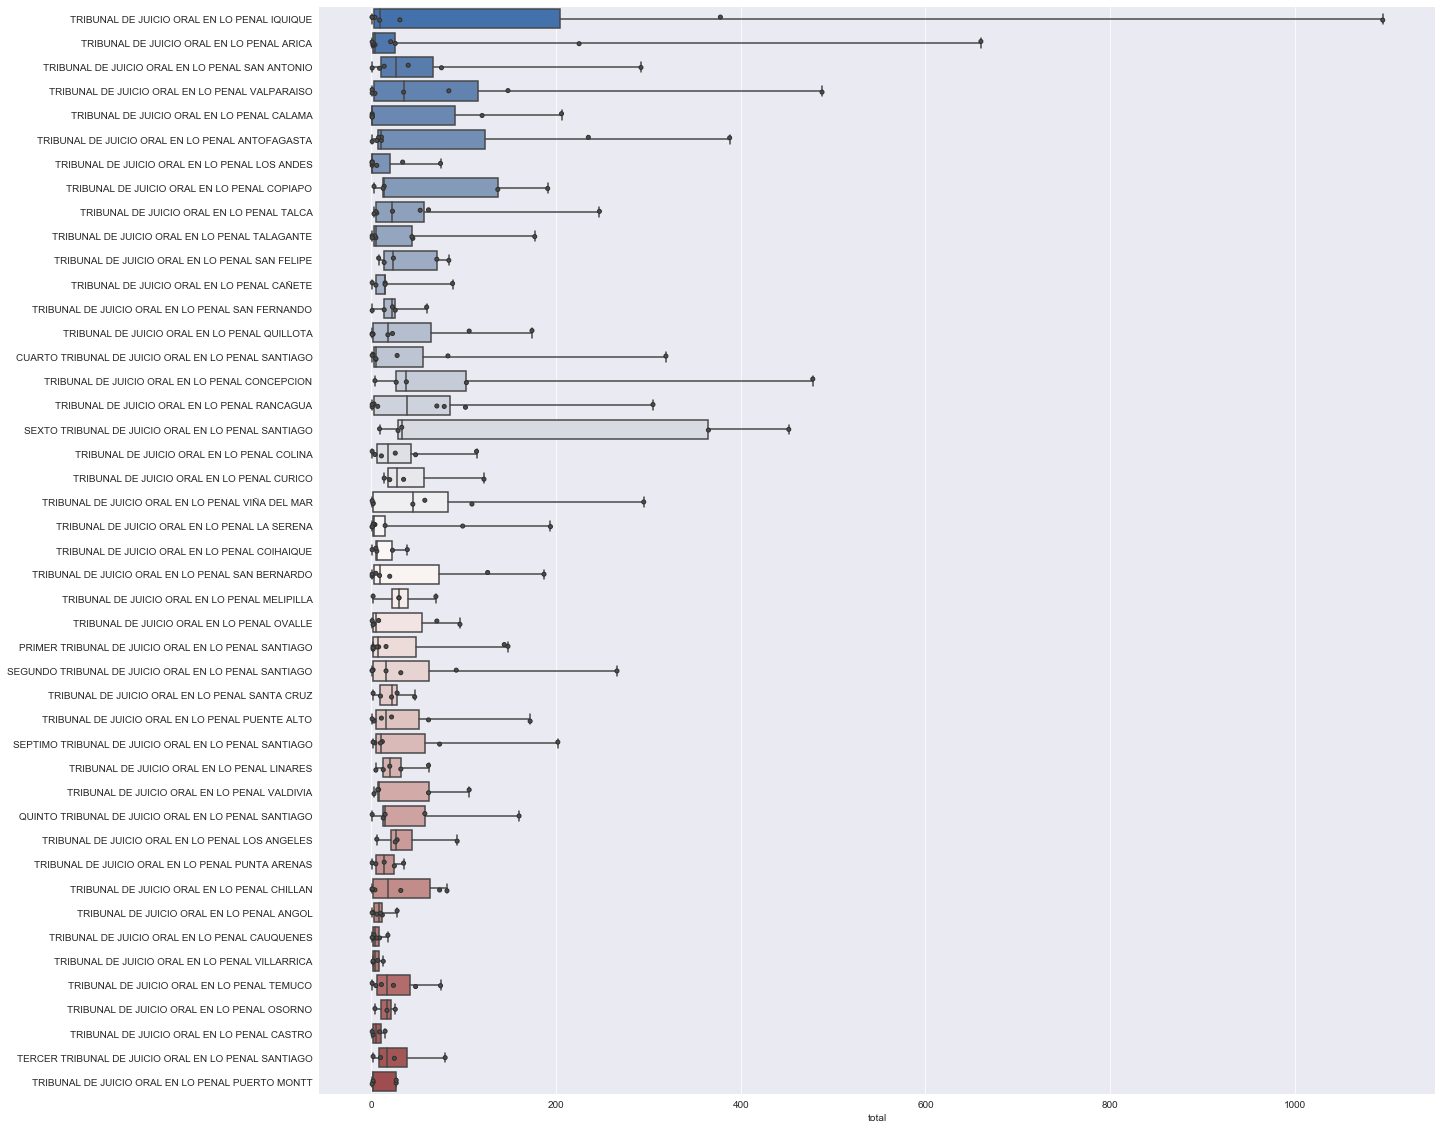

In [27]:


# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(20, 20))
ax.set_xscale("linear")



# Plot the orbital period with horizontal boxes
sns.boxplot(x="total", y="tribunal", data=ley20000,
            whis=[0, 100], width=0.8, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="total", y="tribunal", data=ley20000,
              size=4, color=".3", linewidth=1)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

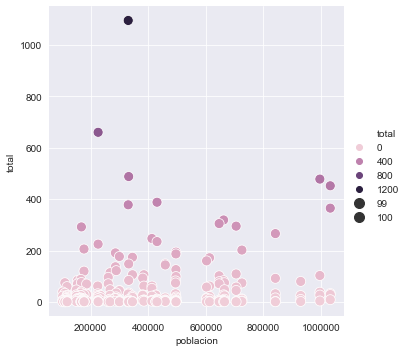

In [28]:
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True)
g = sns.relplot(
    data=ley20000,
    x="poblacion", y="total",
    hue="total", size=100,
    palette=cmap, sizes=(100, 400),
)
g.set(xscale="linear", yscale="linear")
g.ax.xaxis.grid(True, "minor", linewidth=.5)
g.ax.yaxis.grid(True, "minor", linewidth=.5)
g.despine(left=True, bottom=True)

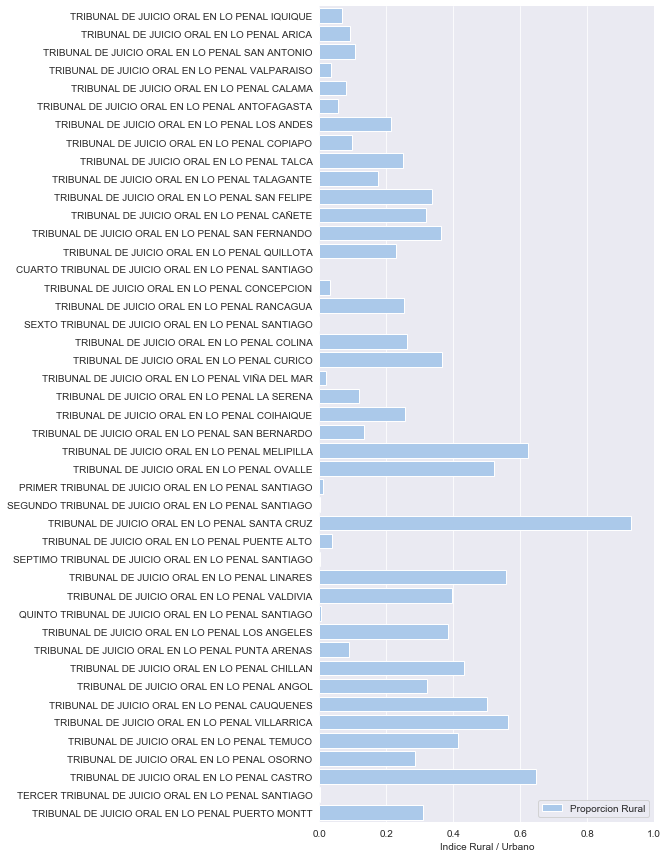

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="territorial", y="tribunal", data=ley20000,
            label="Proporcion Rural", color="b")

# Plot the crashes where alcohol was involved


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Indice Rural / Urbano")
sns.despine(left=True, bottom=True)

In [30]:
nodrogas = causas_oral.query("`tipologia_materia` != 'LEY 20.000 TRAFICO ILICITO DE ESTUPEFACIENTES Y SUSTANCIAS SICOTROPICAS'")

In [31]:
data = []

for (materia,tribunal), sub_df in nodrogas.groupby(by=['materia','tribunal']):
    total = len(sub_df.tribunal_rit.unique())
    poblacion = sub_df.iloc[0].poblacion
    proporcion = total / poblacion
    row = [materia, tribunal, total, poblacion, proporcion]
    data.append(row)

pd.DataFrame(data, columns=['materia','tribunal','total','poblacion','proporcion']).sort_values("proporcion", ascending=False)[:50]

,materia,tribunal,total,poblacion,proporcion
4859,ROBO EN LUGAR HABITADO O DESTINADO A LA HABITA...,TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN ANTONIO,169,168046,0.001006
4611,ROBO CON INTIMIDACION.,TRIBUNAL DE JUICIO ORAL EN LO PENAL IQUIQUE,277,330558,0.000838
4958,ROBO POR SORPRESA.,TRIBUNAL DE JUICIO ORAL EN LO PENAL VALPARAISO,272,332198,0.000819
4474,RECEPTACION. ART. 456 BIS A.,TRIBUNAL DE JUICIO ORAL EN LO PENAL CALAMA,143,177048,0.000808
4916,ROBO POR SORPRESA.,CUARTO TRIBUNAL DE JUICIO ORAL EN LO PENAL SAN...,527,661562,0.000797
4715,ROBO CON VIOLENCIA.,TRIBUNAL DE JUICIO ORAL EN LO PENAL IQUIQUE,259,330558,0.000784
2004,DESACATO (ART. 240 CODIGO DE PROCEDIMIENTO CIV...,TRIBUNAL DE JUICIO ORAL EN LO PENAL SANTA CRUZ,110,150312,0.000732
4633,ROBO CON INTIMIDACION.,TRIBUNAL DE JUICIO ORAL EN LO PENAL VALPARAISO,243,332198,0.000731
4484,RECEPTACION. ART. 456 BIS A.,TRIBUNAL DE JUICIO ORAL EN LO PENAL IQUIQUE,239,330558,0.000723
4737,ROBO CON VIOLENCIA.,TRIBUNAL DE JUICIO ORAL EN LO PENAL VALPARAISO,236,332198,0.000710
